### Preprocessing

In [1]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [2]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# import custom packages
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Heart.csv"
df = pd.read_csv(url, index_col='Unnamed: 0')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [8]:
df.ChestPain.value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [9]:
df.Thal.value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [10]:
df.AHD.value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

In [11]:
df.AHD = df.AHD.map({'No': 0, 'Yes': 1})

In [15]:
df.Thal = pd.factorize(df.Thal)[0]

In [17]:
df.ChestPain = pd.factorize(df.ChestPain)[0]

In [18]:
df.head(25)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,0
2,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,1
3,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,1
4,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,0
5,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,0
6,56,1,3,120,236,0,0,178,0,0.8,1,0.0,1,0
7,62,0,1,140,268,0,2,160,0,3.6,3,2.0,1,1
8,57,0,1,120,354,0,0,163,1,0.6,1,0.0,1,0
9,63,1,1,130,254,0,2,147,0,1.4,2,1.0,2,1
10,53,1,1,140,203,1,2,155,1,3.1,3,0.0,2,1


Text(0.5,59.5,'features')

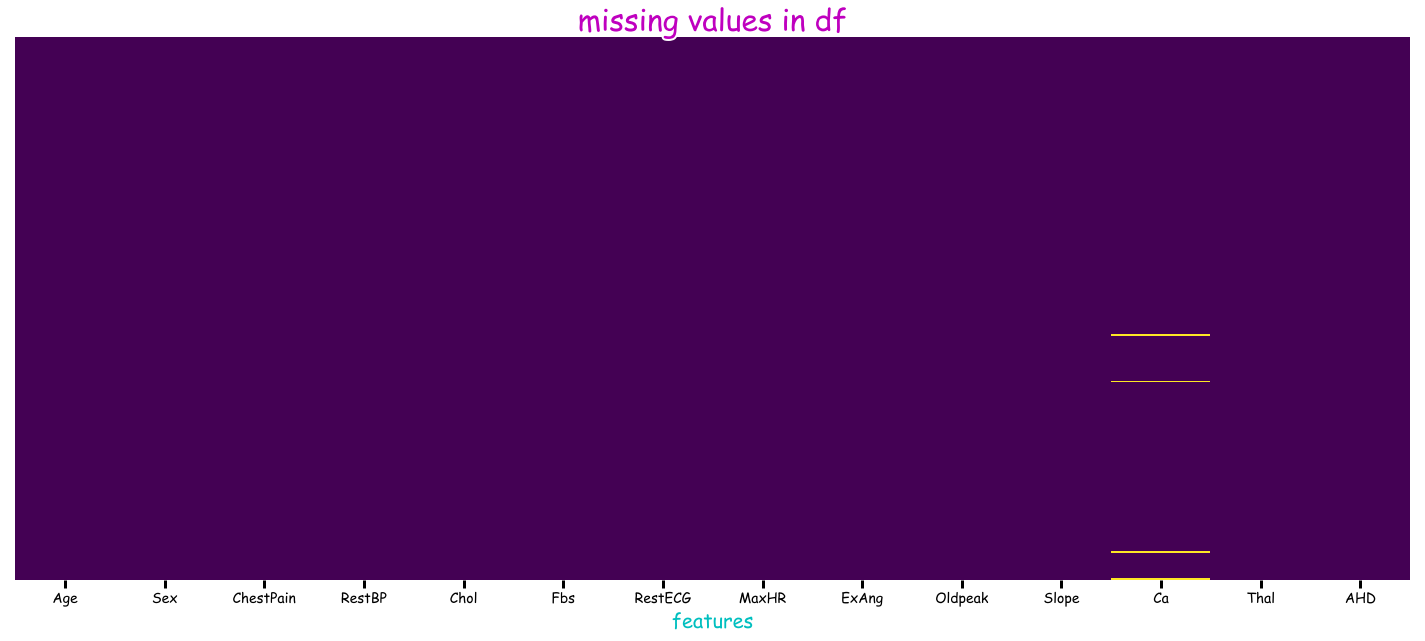

In [27]:
plt.xkcd()
plt.figure(figsize=(25, 10))
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('missing values in df', fontsize=30, color='m')
plt.xlabel('features', fontsize=20, color='c')

In [30]:
df.drop(axis=0, inplace=True, columns='Ca')

Text(0.5,59.5,'features')

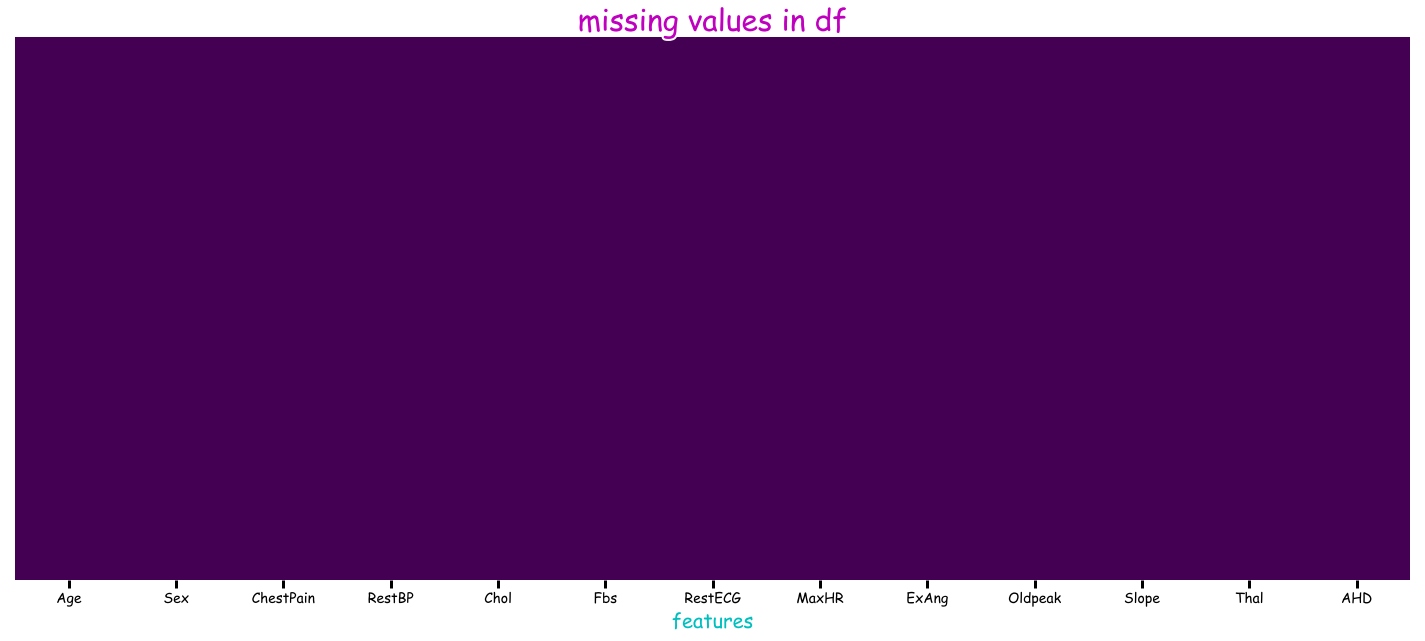

In [32]:
plt.xkcd()
plt.figure(figsize=(25, 10))
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('missing values in df', fontsize=30, color='m')
plt.xlabel('features', fontsize=20, color='c')

**Now, we have no missing values in df.**

### Logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [34]:
X = df.drop(columns='AHD')
y = df.AHD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
logpred = pd.DataFrame(logreg.predict(X_test))
logpred.columns = ['Predictions']

In [36]:
logpred.Predictions = np.where(logpred.Predictions>0.2, 1, 0)
class_mat = pd.DataFrame(confusion_matrix(y_test, logpred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
class_mat

,No,Yes
No,43,12
Yes,8,37


In [37]:
print(classification_report(y_test, logpred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        51
           1       0.82      0.76      0.79        49

   micro avg       0.80      0.80      0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



### Boosting

In [38]:
boost = GradientBoostingRegressor(n_estimators=1000, max_depth=6, learning_rate=0.01).fit(X_train, y_train)

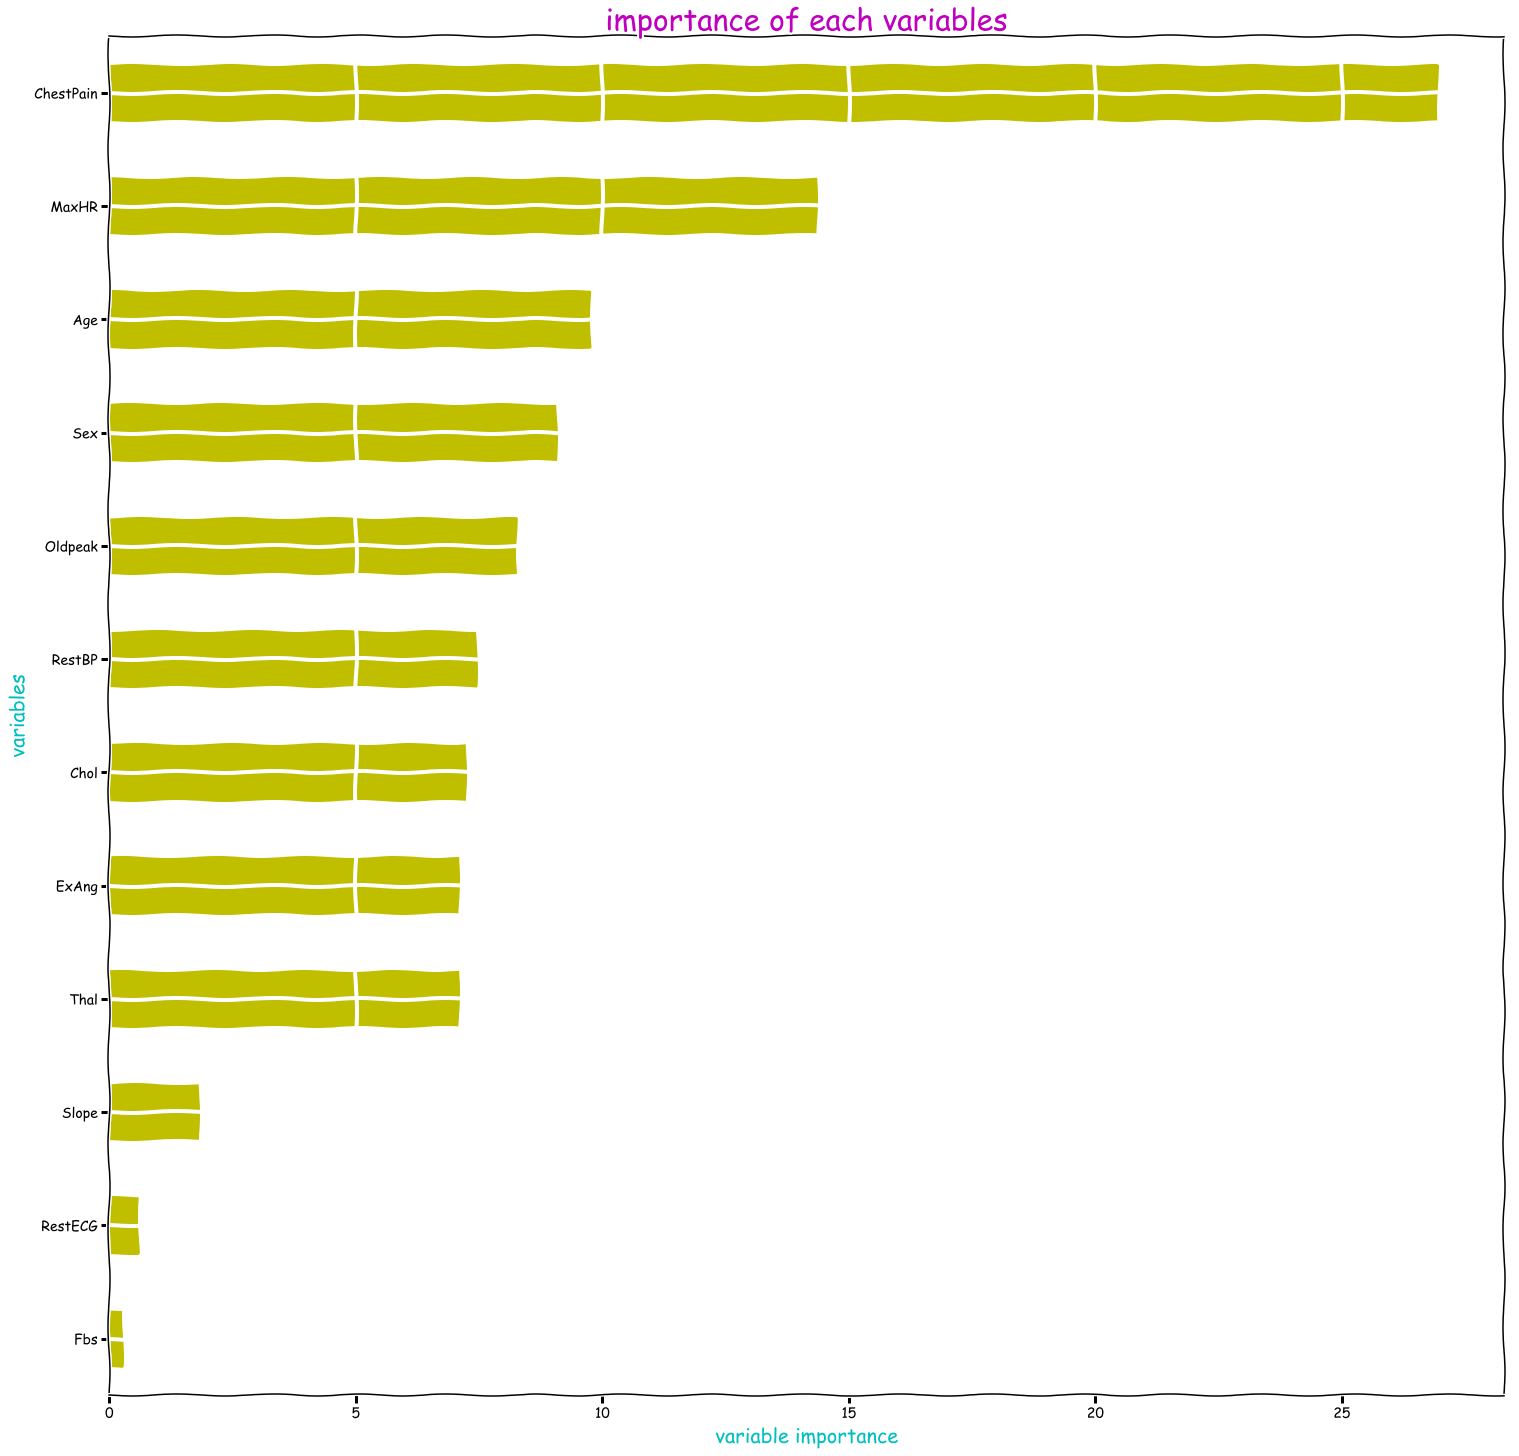

In [39]:
feature_importance = boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', color = 'y', figsize=(25, 25), grid= True, )

plt.xkcd()
plt.xlabel('variable importance', fontsize=20, color='c')
plt.ylabel('variables', fontsize=20, color='c')
plt.title('importance of each variables', fontsize=30, color='m')
plt.gca().legend_ = None

In [40]:
print("Mean Squared Error: ", mean_squared_error(y_test, boost.predict(X_test)))

Mean Squared Error:  0.20323409792962138


In [41]:
boost_pred = pd.DataFrame(boost.predict(X_test))
boost_pred.columns = ['Predictions']
boost_pred.head()

,Predictions
0,0.044103
1,0.095357
2,0.895341
3,0.897384
4,0.896515


In [43]:
boost_pred.mean()

Predictions    0.452202
dtype: float64

In [59]:
boost_prob = np.where(boost_pred.Predictions>0.452202, 1, 0)
boost_prob

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [57]:
class_mat = pd.DataFrame(confusion_matrix(y_test, boost_prob).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
class_mat

,No,Yes
No,39,13
Yes,12,36


In [58]:
print(classification_report(y_test, boost_prob))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76        51
           1       0.75      0.73      0.74        49

   micro avg       0.75      0.75      0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



### Bagging

Mean Squared Error:  0.1483


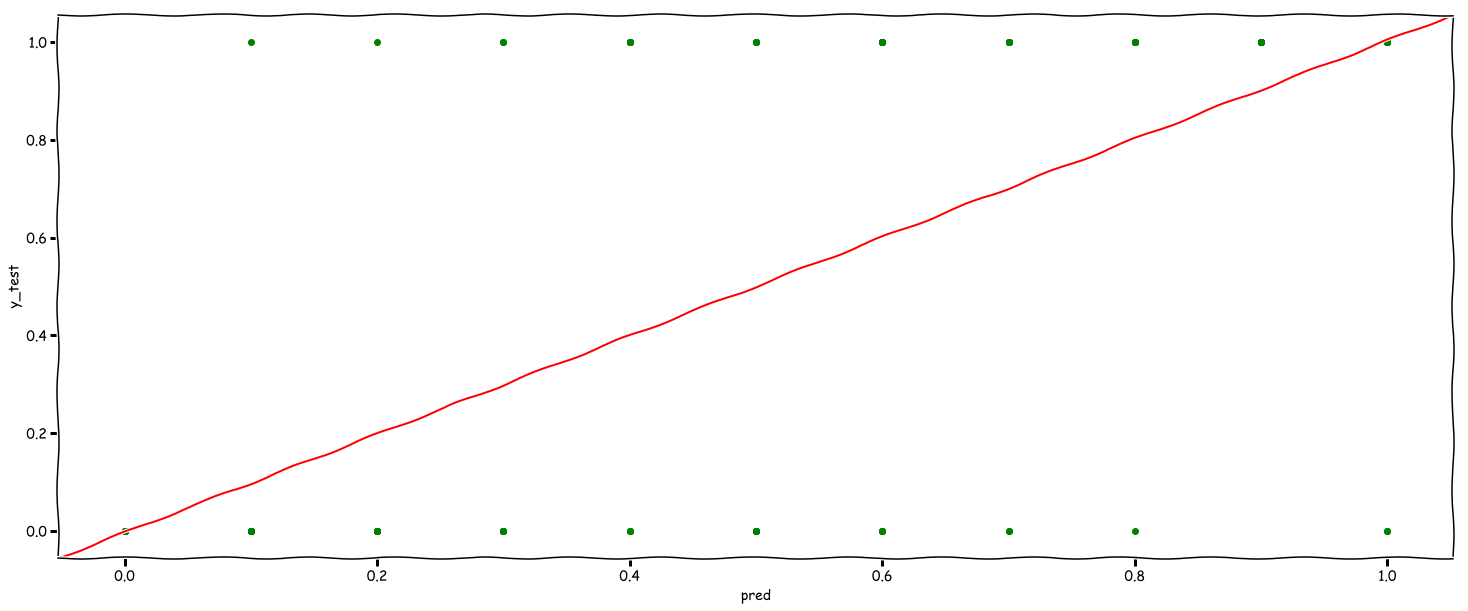

In [52]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

bag = RandomForestRegressor(max_features=12).fit(X_train, y_train)
bag_pred = bag.predict(X_test)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(bag_pred, y_test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'r', transform = plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

print("Mean Squared Error: ", mean_squared_error(y_test, bag_pred))

In [53]:
bag_pred.mean()

0.49300000000000005

In [55]:
bag_prob = np.where(bag_pred>0.49300000000000005, 1, 0)
bag_prob

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [60]:
class_mat = pd.DataFrame(confusion_matrix(y_test, bag_prob).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
class_mat

,No,Yes
No,37,9
Yes,14,40


In [61]:
print(classification_report(y_test, bag_prob))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        51
           1       0.74      0.82      0.78        49

   micro avg       0.77      0.77      0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



### Random forests

Mean Squared Error:  0.1607


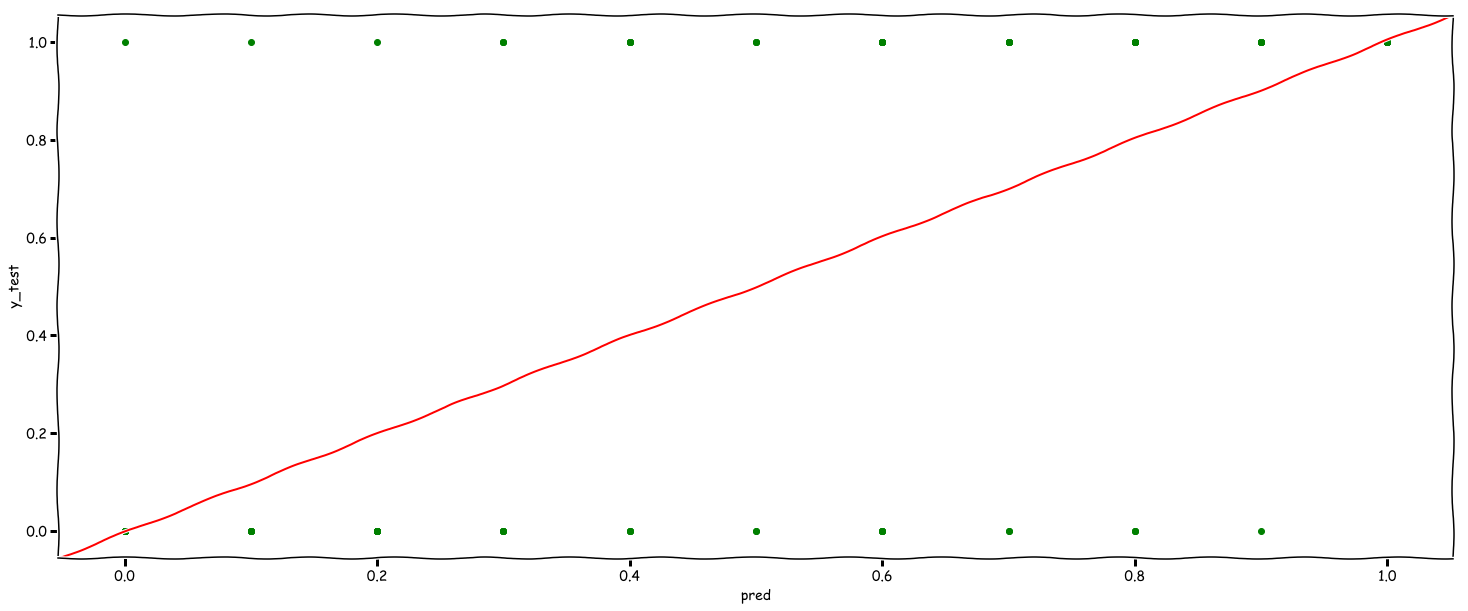

In [63]:
rf = RandomForestRegressor(max_features=5).fit(X_train, y_train)

rf_pred = rf.predict(X_test)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(rf_pred, y_test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'r', transform = plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

print("Mean Squared Error: ", mean_squared_error(y_test, rf_pred))

In [64]:
rf_pred.mean()

0.47699999999999987

In [65]:
rf_prob = np.where(bag_pred>0.47699999999999987, 1, 0)
rf_prob

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [66]:
class_mat = pd.DataFrame(confusion_matrix(y_test, rf_prob).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
class_mat

,No,Yes
No,37,9
Yes,14,40


In [67]:
print(classification_report(y_test, rf_prob))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        51
           1       0.74      0.82      0.78        49

   micro avg       0.77      0.77      0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



**For the Heart data set, logistic regression provides the best results.**